# Imports

In [1]:
from scipy.stats import weibull_min as W
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import linear_model

%matplotlib inline

# Assignment 1

In [ ]:
def days_to_minutes(days_num):
    return days_num*24*60

## a)

In [ ]:
c = 0.5
N = 1000
for t in [150, days_to_minutes(1), days_to_minutes(2), days_to_minutes(5)]:
    print(N*(1-W.cdf(t, c, scale=60)))

205.7406610838144
7.454186295369869
0.9797596903721173
0.01748003561785616


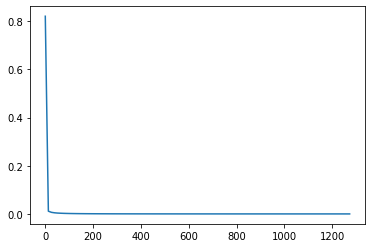

In [ ]:
x = np.linspace(W.ppf(0.01, c, scale=60),
                W.ppf(0.99, c, scale=60), 100)
plt.plot(x, W.pdf(x, c, scale=60))

## b)

In [ ]:
c = 1
N = 1000
for t in [150, days_to_minutes(1), days_to_minutes(2), days_to_minutes(5)]:
    print(N*(1-W.cdf(t, c, scale=60)))

82.08499862389884
3.775135759553905e-08
0.0
0.0


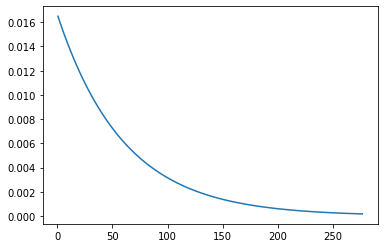

In [ ]:
x = np.linspace(W.ppf(0.01, c, scale=60),
                W.ppf(0.99, c, scale=60), 100)
plt.plot(x, W.pdf(x, c, scale=60))

In [ ]:
c = 1.5
N = 1000
for t in [150, days_to_minutes(1), days_to_minutes(2), days_to_minutes(5)]:
    print(N*(1-W.cdf(t, c, scale=60)))

19.199960155009578
0.0
0.0
0.0


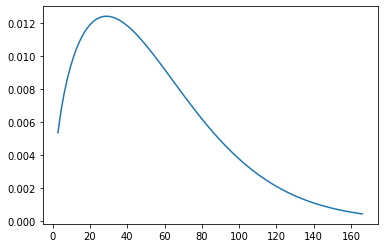

In [ ]:
x = np.linspace(W.ppf(0.01, c, scale=60),
                W.ppf(0.99, c, scale=60), 100)
plt.plot(x, W.pdf(x, c, scale=60))

In [ ]:
c = 2.5
N = 1000
for t in [150, days_to_minutes(1), days_to_minutes(2), days_to_minutes(5)]:
    print(N*(1-W.cdf(t, c, scale=60)))

0.05107999176456879
0.0
0.0
0.0


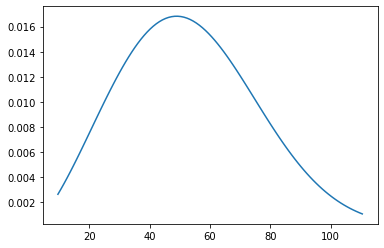

In [ ]:
x = np.linspace(W.ppf(0.01, c, scale=60),
                W.ppf(0.99, c, scale=60), 100)
plt.plot(x, W.pdf(x, c, scale=60))

# Assignment 2

## Utilities

In [234]:
def plot_raw_prediction(df):
    plt.figure(figsize=(12,4))
    df['preprocessed'].plot(label='preprocessed data')
    df['prediction_raw'].plot(label='raw prediction')
    plt.axvline(split_date, color='r')
    plt.xlabel('Time')
    plt.ylabel('')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
def plot_prediction(ax, df, split_date=np.datetime64('1957-01-01')):
    df['prediction'].plot(ax=ax, label='predicted data')
    df['Passengers'].plot(ax=ax, label='original data')
    ax.axvline(split_date, color='r')
    ax.legend(loc='upper left')
    ax.set_xlabel('Time')
    ax.set_ylabel('Passengers')
    ax.set_title('Airline Passengers')

def plot_error(ax, df, test_size=48):
    (df['Passengers'] - df['prediction']).plot(ax=ax, kind='bar')
    ax.axvline(df.shape[0]-test_size, color='r')
    ax.set_xticks([])
    ax.set_xlabel('Time')
    ax.set_ylabel('Passengers')
    ax.set_title('Airline Passengers - Prediction Errors')

def plot_error_normalised(ax, df, test_size=48):
    plt.figure(figsize=(12,4))
    ((df['Passengers'] - df['prediction']) / df['Passengers']).plot(ax=ax, kind='bar')
    ax.axvline(df.shape[0]-test_size, color='r')
    ax.set_xticks([])
    ax.set_xlabel('Time')
    ax.set_ylabel('Passengers [in %]')
    ax.set_title('Airline Passengers - Prediction Percentage Errors')

In [238]:
def print_errors(df):
    print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
    print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
    print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

## a)

In [264]:
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=['Month'])
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Splitting dataset

In [114]:
split_date = np.datetime64('1957-01-01')
train_size = (df.index < split_date).sum()
train_df, test_df = df.iloc[:train_size], df.iloc[train_size:]

### Preprocessing

In [115]:
# preprocessing

train_df['trend'] = train_df['Passengers'].ewm(halflife=12).mean()
train_df['detrended'] = train_df['Passengers'] / train_df['trend']
df_seasonality = train_df['detrended'].groupby(train_df.index.month).mean().rename('seasonality')
train_df = train_df.join(df_seasonality, how='left', on=train_df.index.month)
train_df['preprocessed'] = train_df['detrended'] - train_df['seasonality']

test_df['trend'] = test_df['Passengers'].ewm(halflife=12).mean()
test_df['detrended'] = test_df['Passengers'] / test_df['trend']
test_df = test_df.join(df_seasonality, how='left', on=test_df.index.month)
test_df['preprocessed'] = test_df['detrended'] - test_df['seasonality']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

### Approach 1: Prediction by global mean

In [235]:
train_df['prediction_raw'] = train_df['preprocessed'].mean()
test_df['prediction_raw'] = train_df['preprocessed'].mean()

train_df['prediction'] = (train_df['prediction_raw'] + train_df['seasonality']) * train_df['trend']
test_df['prediction'] = (test_df['prediction_raw'] + test_df['seasonality']) * test_df['trend']

In [240]:
combined_df = train_df.append(test_df)

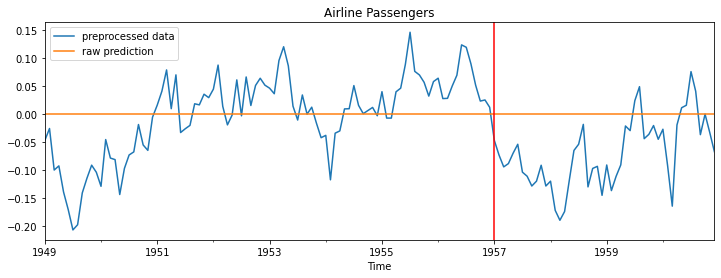

In [241]:
plot_raw_prediction(combined_df)

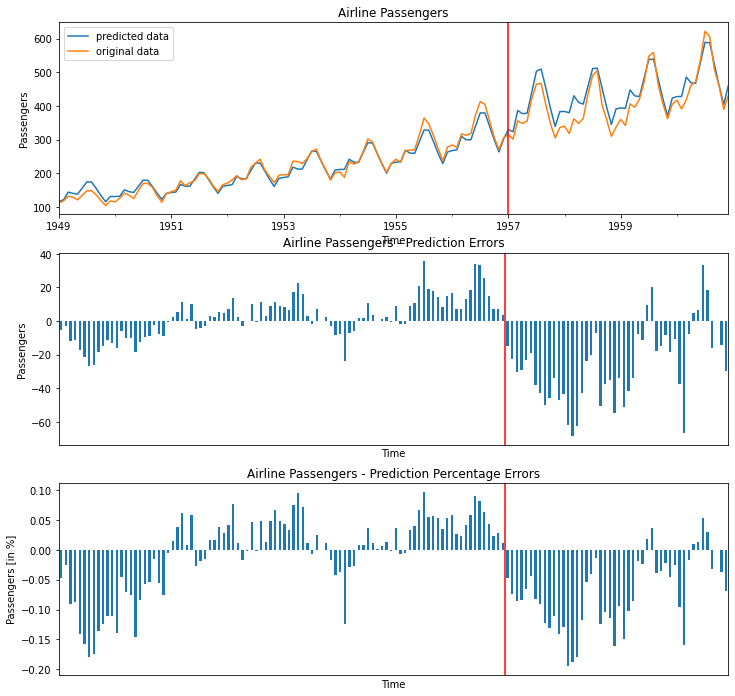

<Figure size 864x288 with 0 Axes>

In [242]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
plot_prediction(ax1, combined_df)
plot_error(ax2, combined_df)
plot_error_normalised(ax3, combined_df)

In [244]:
print_errors(combined_df)

MSE: 502.5302
MAE: 16.4277
MAPE: 0.0591


### Approach 2: Prediction by previous value

Doesn't make sense w/ split?

### Approach 3: Prediction by moving averate

Doesn't make sense w/ split?

### Approach 4: Prediction by linear regression

In [251]:
reg = linear_model.LinearRegression()

train_X = train_df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
train_y = train_df['preprocessed'].values[1:]

reg.fit(train_X, train_y)

combined_X = combined_df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y_predicted = np.zeros(len(combined_df))
y_predicted[1:] = reg.predict(combined_X)

combined_df['prediction_raw'] = y_predicted
combined_df['prediction'] = (combined_df['prediction_raw'] + combined_df['seasonality']) * combined_df['trend']

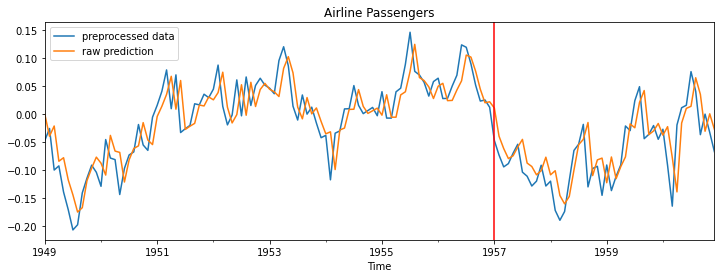

In [252]:
plot_raw_prediction(combined_df)

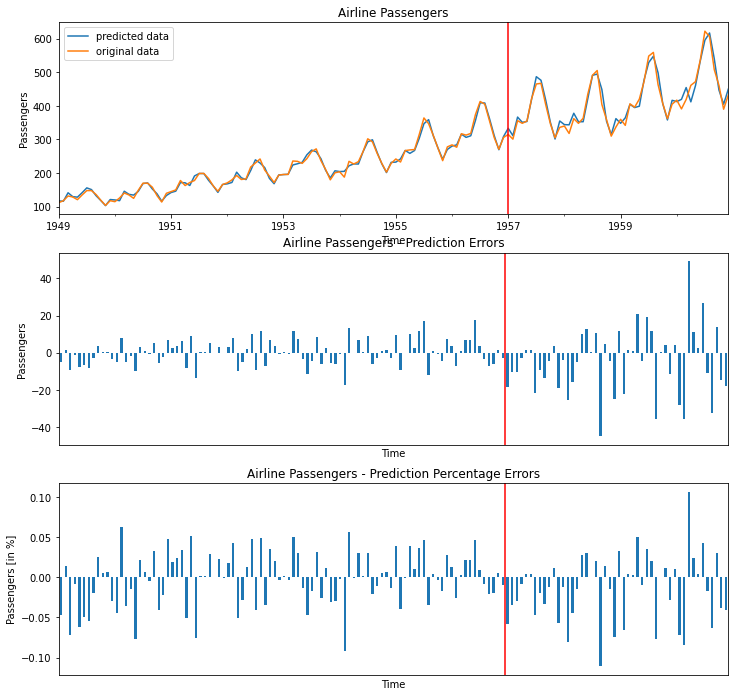

<Figure size 864x288 with 0 Axes>

In [253]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
plot_prediction(ax1, combined_df)
plot_error(ax2, combined_df)
plot_error_normalised(ax3, combined_df)

In [255]:
print_errors(combined_df)

MSE: 141.3780
MAE: 8.2679
MAPE: 0.0291


### Approach 4a: Prediction by multidimensional linear regression

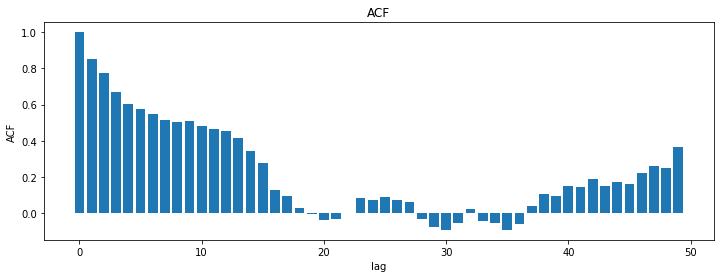

In [257]:
acf = np.zeros(50)
for lag in range(len(acf)):
    acf[lag] = np.corrcoef(train_df['preprocessed'][lag:], train_df['preprocessed'].shift(lag)[lag:])[0, 1]

plt.figure(figsize=(12,4))
plt.bar(range(len(acf)), acf)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.title('ACF')
plt.show()

In [260]:
reg = linear_model.LinearRegression()

train_X = np.vstack([train_df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
train_y = train_df['preprocessed'].values[15:]

reg.fit(train_X, train_y)

combined_X = np.vstack([combined_df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y_predicted = np.zeros(len(combined_df))
y_predicted[15:] = reg.predict(combined_X)

combined_df['prediction_raw'] = y_predicted
combined_df['prediction'] = (combined_df['prediction_raw'] + combined_df['seasonality']) * combined_df['trend']

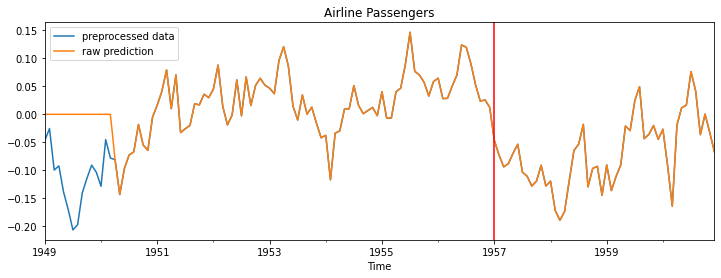

In [261]:
plot_raw_prediction(combined_df)

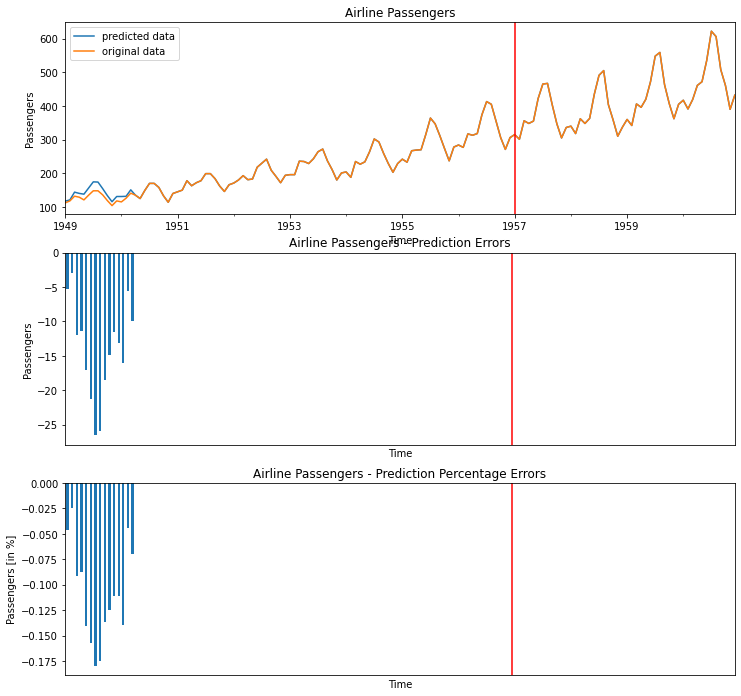

<Figure size 864x288 with 0 Axes>

In [262]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
plot_prediction(ax1, combined_df)
plot_error(ax2, combined_df)
plot_error_normalised(ax3, combined_df)

In [263]:
print_errors(combined_df)

MSE: 25.6091
MAE: 1.4718
MAPE: 0.0114


## b)

### Splitting dataset

In [302]:
split_date = np.datetime64('1957-01-01')
train_size = (df.index < split_date).sum()
train_df, test_df = df.iloc[:train_size], df.iloc[train_size:]

### Prediction by linear regression without preprocessing

In [319]:
reg = linear_model.LinearRegression()

train_X = train_df['Passengers'].shift(1).values[1:].reshape(-1, 1)
train_y = train_df['Passengers'].values[1:]

reg.fit(train_X, train_y)

combined_X = combined_df['Passengers'].shift(1).values[1:].reshape(-1, 1)
y_predicted = np.zeros(len(combined_df))
y_predicted[1:] = reg.predict(combined_X)

combined_df['prediction'] = y_predicted

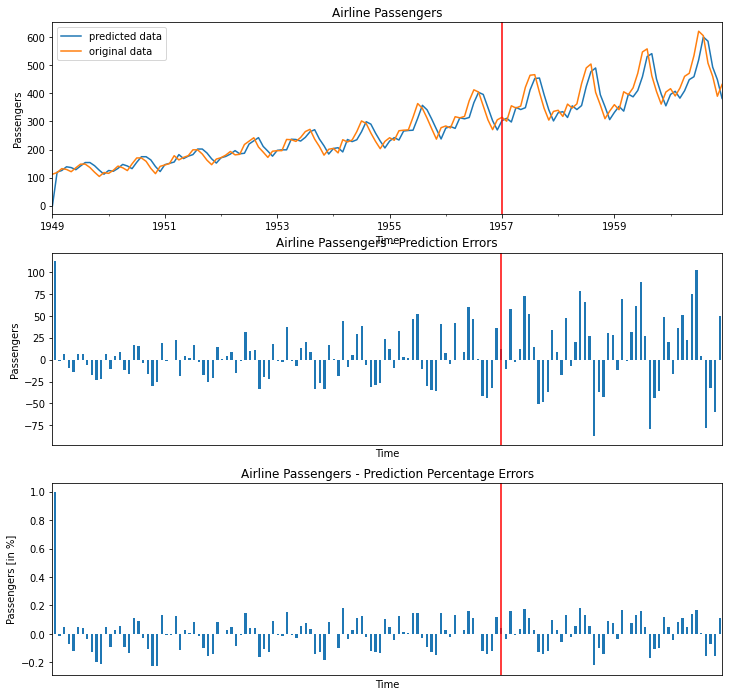

<Figure size 864x288 with 0 Axes>

In [320]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
plot_prediction(ax1, combined_df)
plot_error(ax2, combined_df)
plot_error_normalised(ax3, combined_df)

In [321]:
print_errors(combined_df)

MSE: 1204.3566
MAE: 26.2787
MAPE: 0.0954


### Prediction by multidimensional linear reagression without preprocessing

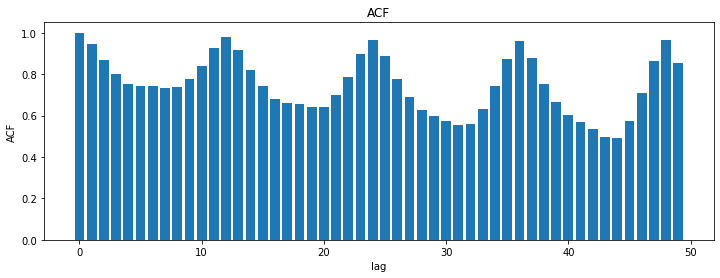

In [322]:
acf = np.zeros(50)
for lag in range(len(acf)):
    acf[lag] = np.corrcoef(train_df['Passengers'][lag:], train_df['Passengers'].shift(lag)[lag:])[0, 1]

plt.figure(figsize=(12,4))
plt.bar(range(len(acf)), acf)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.title('ACF')
plt.show()

In [323]:
combined_df = train_df.append(test_df)

In [324]:
reg = linear_model.LinearRegression()

train_X = np.vstack([train_df['Passengers'].shift(lag).values[15:] for lag in range(15)]).T
train_y = train_df['Passengers'].values[15:]

reg.fit(train_X, train_y)

combined_X = np.vstack([combined_df['Passengers'].shift(lag).values[15:] for lag in range(15)]).T
y_predicted = np.zeros(len(combined_df))
y_predicted[15:] = reg.predict(combined_X)

combined_df['prediction'] = y_predicted

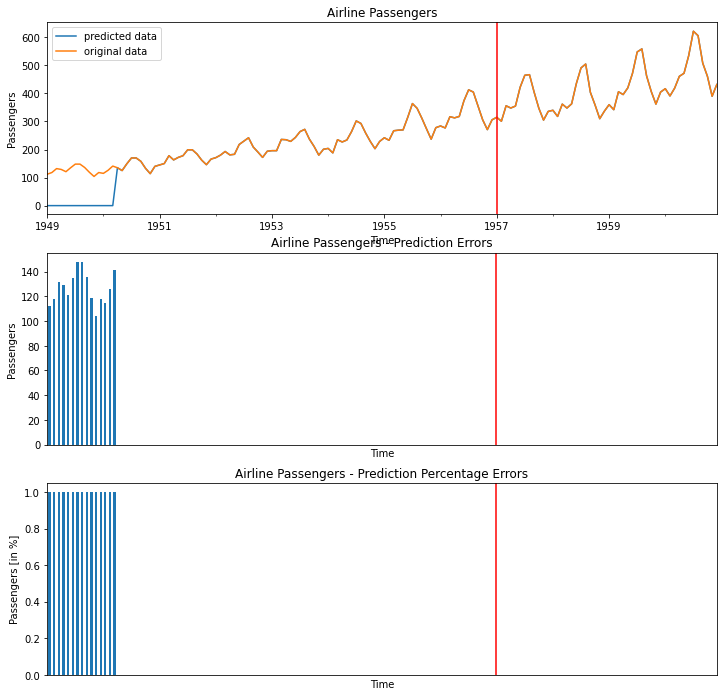

<Figure size 864x288 with 0 Axes>

In [325]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
plot_prediction(ax1, combined_df)
plot_error(ax2, combined_df)
plot_error_normalised(ax3, combined_df)

In [326]:
print_errors(combined_df)

MSE: 1691.5694
MAE: 13.2083
MAPE: 0.1042


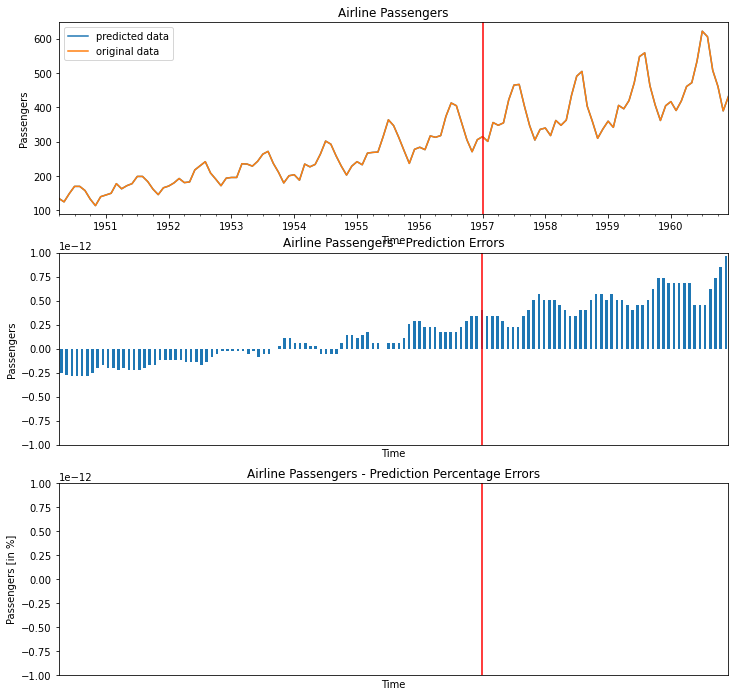

<Figure size 864x288 with 0 Axes>

In [327]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
plot_prediction(ax1, combined_df[15:])
plot_error(ax2, combined_df[15:])
plot_error_normalised(ax3, combined_df[15:])

In [328]:
print_errors(combined_df[15:])

MSE: 0.0000
MAE: 0.0000
MAPE: 0.0000
